In [1]:
#problem statement:
"""Develop a sentiment analysis model to classify restarunt reviews as positive or negative___"""
#restarunt review dataset is in csv file"""

'Develop a sentiment analysis model to classify restarunt reviews as positive or negative'

In [2]:
#Description
"""with the rapid growth of online platform for sharing opinions and reviews,restarunts often relay on the customer feedback to improve their services and attract new customers"""
#Analyzing the sentiment of these reviews can provide valuable insights into customer satis

'with the rapid growth of online platform for sharing opinions and reviews,restarunts often relay on the customer feedback to improve their services and attract new customers'

In [3]:
import pandas as pd


In [4]:
data = pd.read_csv('Reviews.csv') #loading the csv file

In [5]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
data.head() #shows top 5 rows

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
data.tail(10) #last 10 rows of data set

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [8]:
data.info() #info about data set like:datatype, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
#statical analysis of data set
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [10]:
data.isnull() #checking the null values of data set

,Review,Liked
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [11]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [12]:
data.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [13]:
#checking the value counts
value_counts = data['Liked'].value_counts()
value_counts

Liked
1    500
0    500
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


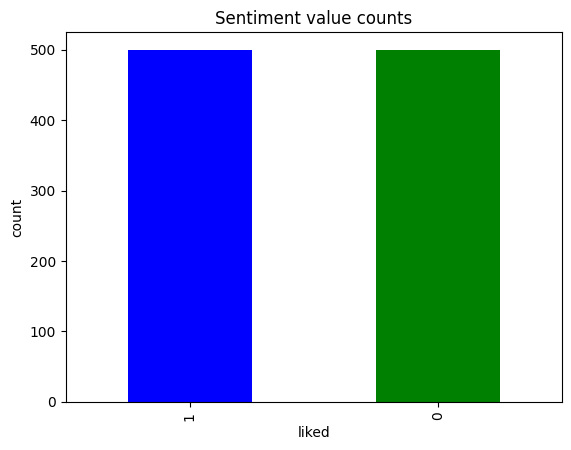

In [15]:
value_counts.plot(kind = 'bar',color = ['blue','green'])
plt.title("Sentiment value counts")
plt.xlabel("liked")
plt.ylabel("count")
plt.show()

In [16]:
from wordcloud import WordCloud #text data analysis

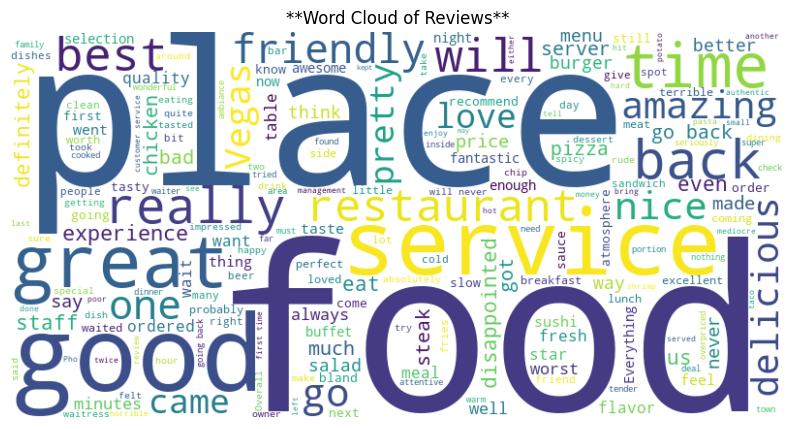

In [17]:
combined_text = " ".join(data['Review'])
wordcloud = WordCloud(width = 800,height = 400,background_color = 'white').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('**Word Cloud of Reviews**')
plt.show()

In [18]:
from collections import Counter

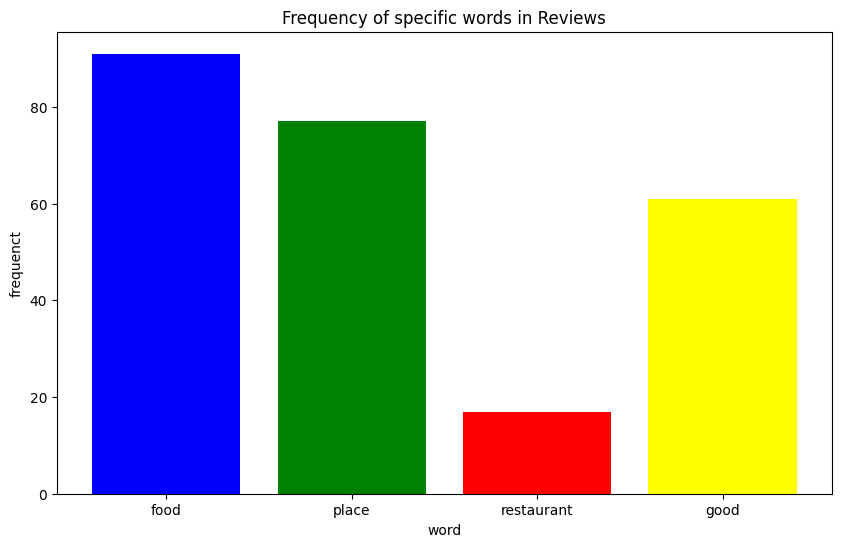

In [19]:
target_words = ['food','place','restaurant','good']
all_words = " ".join(data['Review']).lower().split()
word_count = Counter(all_words)
target_word_counts = {word:word_count[word] for word in target_words}
plt.figure(figsize=(10,6))
plt.bar(target_word_counts.keys(),target_word_counts.values(),color = ['blue','green','red','yellow'])

plt.xlabel("word")
plt.ylabel("frequenct")
plt.title("Frequency of specific words in Reviews")
plt.show()


In [20]:
#12th june 2024
#text preprocessing

In [21]:
#covert the data set into lowercase
lowercased_text = data['Review'].str.lower()
print(lowercased_text)



0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [22]:
#tokinization: whole sentence is converted into small text
#breaking the para into words
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tharu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
data['Tokens'] = data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [24]:
data['Review'].value_counts()

Review
#NAME?                                                                                                                                    4
The food was terrible.                                                                                                                    2
I would not recommend this place.                                                                                                         2
I love this place.                                                                                                                        2
I won't be back.                                                                                                                          2
                                                                                                                                         ..
OMG, the food was delicioso!                                                                                                              1
There is noth

In [25]:
import string


In [26]:
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)

In [27]:
data['Review'].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [28]:
#remove stop words
#from nltk.corpus import stopwords

In [29]:
#stop_words = set(stopwords.words('english'))
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Make sure to download the stopwords dataset if you haven't already
import nltk
nltk.download('stopwords')

# Now, create a list of stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tharu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
data['tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [31]:
#The error you’re encountering is due to the misuse of the stopwords variable in the lambda function. You’ve correctly created a set of stopwords named stop_words, but within the lambda function, you are referencing stopwords instead of stop_words.
# Assuming the rest of your code is correct and 'data' is a pandas DataFrame with a column 'Review'
data['tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
print(data['tokens'])


0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                           [Not, tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                  [The, selection, menu, great, prices]
                             ...                        
995           [I, think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997             [Overall, I, impressed, would, go, back]
998    [The, whole, experience, underwhelming, I, thi...
999    [Then, I, wasted, enough, life, poured, salt, ...
Name: tokens, Length: 1000, dtype: object


In [32]:
data['tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [33]:
#steamming
#processing of reducing the word to root word by removing the root word
#example: driving = drive

In [34]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [35]:
stemmer = PorterStemmer()

In [36]:
data['stemmed'] = data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [37]:
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [38]:
#lemmantization: transforming a word into its base or dictionary form
#example: better = good

In [39]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tharu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [41]:
lemmatizer = WordNetLemmatizer()

In [42]:
data['Lemmatizer'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word,pos=wordnet.VERB) for word in word_tokenize(x)]))

                                                              

In [43]:
print(data['Lemmatizer'])

0                                   Wow Loved this place
1                                      Crust be not good
2                Not tasty and the texture be just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                                Appetite instantly go
997       Overall I be not impress and would not go back
998    The whole experience be underwhelming and I th...
999    Then as if I hadn t waste enough of my life th...
Name: Lemmatizer, Length: 1000, dtype: object


In [44]:
#remove numbers from reviews
import re
data['No_Numbers'] = data['Review'].apply(lambda x: re.sub(r'\d+',' ',x).lower())
print(data['No_Numbers'])

0                               wow    loved this place 
1                                     crust is not good 
2              not tasty and the texture was just nasty 
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone 
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming  and i ...
999    then  as if i hadn t wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [45]:
#remove special characters like @,#,$...
import contractions
data['Cleaned'] = data['Review'].apply(lambda x: re.sub(r'[^A-Z a-z 0-9\s]',' ',x).lower())
print(data['Cleaned'])


0                               wow    loved this place 
1                                     crust is not good 
2              not tasty and the texture was just nasty 
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone 
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming  and i ...
999    then  as if i hadn t wasted enough of my life ...
Name: Cleaned, Length: 1000, dtype: object


In [46]:
 #expanding the words
#example: don't = do not
!pip install contractions
import contractions



In [47]:
data['Expanded'] = data['Review'].apply(contractions.fix)
print(data['Expanded'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Expanded, Length: 1000, dtype: object


In [48]:
#remove emojis
!pip install emoji

In [49]:
import emoji
data['Emoji_free'] = data['Review'].apply(emoji.demojize)
print(data['Emoji_free'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Emoji_free, Length: 1000, dtype: object


In [50]:
#removing the links like www.abchotet.in
!pip install scikit-learn


In [51]:
from bs4 import BeautifulSoup

In [52]:
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [53]:
!pip install scikit-learn
import sklearn
print(sklearn.__version__)


1.5.0


In [54]:
#TF IDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [55]:
x = vectorizer.fit_transform(data['Review'])
print(x.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [56]:
#building a machine learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [57]:
vectorizer = TfidfVectorizer()

In [58]:
x = vectorizer.fit_transform(data['Review'])
y = data['Liked']

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [60]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [61]:
y_pred = model.predict(x_test)

In [62]:
accuracy = accuracy_score(y_test,y_pred)

In [63]:
report = classification_report(y_test,y_pred)

In [64]:
print(f'Accuracy:{accuracy}')

Accuracy:0.8


In [65]:
print(f"classification Report:")
print(report)

classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [66]:
#prediction of new review
def preprocess_review(review):
    review = review.lower()
    review = BeautifulSoup(review,"html.parser").get_text()
    review = re.sub(f"[{string.punctuation}]",' ',review)
    review = contractions.fix(review)
    review = emoji.demojize(review)
    tokens = word_tokenize(review)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word,pos = 'v') for word in tokens]
    cleaned_review = ' '.join(lemmatized_tokens)
    return cleaned_review
    

In [67]:
#new review prediction
new_review = input("enter your opinoin:")
cleaned_review = preprocess_review(new_review)
new_review_vectorized = vectorizer.transform([cleaned_review])
prediction = model.predict(new_review_vectorized)
if prediction[0] == 1:
    print("The review is positive")
else:
    print("The review is negative")


enter your opinoin: the food is delicious!


The review is positive
